## Técnicas en Opencv

TAREAS: 

1. Realiza distintas fotografías en clase y utilizando el detector de bordes Canny que nos facilita OpenCV prueba si se detectan correctamente los objetos. Prueba también con varios objetos como monedas, tornillos,... para probar si puedes contarlos. Puedes utilizar como ayuda el siguiente documento.

2. Haz una foto en clase con varios compañeros y prueba a detectar los rostros utilizando el clasificador Haar Cascade que está incorporado en OpenCV.

3. Ahora que ya eres capaz de detectar caras prueba con el Reconocimiento facial. Investiga qué tipo de clasificadores hay detrás de las 3 técnicas empleadas(Eigenfaces, Fisherfaces y Local Binary Patterns Histograms) 

    Crea una carpeta "imagenes". Dentro de esta crea 4 carpetas con fotos. Dentro de cada una coloca al menos 8 imágenes con el rostro correspondiente.
    Crea un script entrena_caras.py que cree un dataset de entrenamiento: como Y una lista de identificadores (enteros) y como X una lista de fragmentos de las imágenes correspondientes a los rostros detectados por un clasificador en cascada. Crea un modelo (modelo=cv2.face.LBPHFaceRecognizer_create), entrénalo (modelo.train) y guarda el resultado (modelo.save) 
    Crea un script detecta_caras.py que en un video detecte las caras entrenadas

### Ralphy Núñez Mercado

### Imports 

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## Parte 1


### Cargar la imagen

In [2]:
imagePath = 'fotos/IMG_6971.jpg'

imagen = cv2.imread(imagePath)

### Quitar castaña y ficha azul

In [3]:
hsv = cv2.cvtColor(imagen, cv2.COLOR_BGR2HSV)

# Definir un rango para que cubra tonos de azul
azul_minimo = np.array([90, 50, 50])  
azul_maximo = np.array([150, 255, 255]) 

# Crear una máscara que filtre solo los píxeles azules
mask = cv2.inRange(hsv, azul_minimo, azul_maximo)

# Crear una imagen de color blanco
imagen_blanca = np.ones_like(imagen) * 255  # Una imagen completamente blanca

# Reemplazar los píxeles azules por blanco
result = cv2.bitwise_and(imagen_blanca, imagen_blanca, mask=mask)
imagen_sin_azul = cv2.bitwise_or(result, cv2.bitwise_and(imagen, imagen, mask=cv2.bitwise_not(mask)))  # Resto de la imagen permanece igual

### Redimensionar la imagen

In [4]:
imagen_redimensionada = cv2.resize(imagen_sin_azul, (500, 500))

### Cambiamos el brillo y el constraste

In [5]:
imagen_brillo_contraste = cv2.convertScaleAbs(imagen_redimensionada, alpha=1.5, beta=50) 

### Finalmente pasamos la imagen a escala de grises

In [6]:
imagen_gris = cv2.cvtColor(imagen_brillo_contraste, cv2.COLOR_BGR2GRAY)

### Filtro Guassiano para eliminar el ruido en la imagen 


In [7]:
gaussiana = cv2.GaussianBlur(imagen_gris, (9,9), 0)

Hacemos esto para que a opencv le sea mas facil distinguir los bordes.

### Detectamos los bordes con Canny

In [8]:
canny = cv2.Canny(gaussiana, 50, 150, L2gradient = True, apertureSize = 3)

### Redimensionar la imagenes para mostrarlas de una manera más nitida 

In [9]:
imagen = cv2.resize(imagen, (1080, 720))
imagen_brillo_contraste = cv2.resize(imagen_brillo_contraste, (1080, 720))   
imagen_gris = cv2.resize(imagen_gris, (1080, 720))   
gaussiana = cv2.resize(gaussiana, (1080, 720)) 
canny = cv2.resize(canny, (1080, 720)) 

### Mostrar el proceso por el que va pasando la imagen original hasta obtener los bordes de las monedas 

In [10]:
cv2.imshow("orignal", imagen)
cv2.waitKey(0)
cv2.imshow("imagen cambiando el brillo y el contraste", imagen_brillo_contraste)
cv2.waitKey(0)
cv2.imshow("gris", imagen_gris)
cv2.waitKey(0)
cv2.imshow("suavizado", gaussiana)
cv2.waitKey(0)
cv2.imshow("canny", canny)
cv2.waitKey(0)

-1

### Buscamos los contornos

In [11]:
(contornos,_) = cv2.findContours(canny.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


### Mostramos el número de monedas por consola

In [12]:
print("He encontrado {} objetos".format(len(contornos)))

cv2.drawContours(imagen,contornos,-1,(0,0,255), 2)
cv2.imshow("contornos", imagen)
cv2.waitKey(0)

He encontrado 8 objetos


-1

## Parte 2 

Paso 1: importar el paquete OpenCV

In [13]:
imagePath = 'fotos/IMG_6916.jpg'

Paso 2: leer la imagen

In [14]:
img = cv2.imread(imagePath)

img.shape

(4032, 3024, 3)

Paso 3: convertir la imagen a escala de grises

In [15]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


Paso 4: cargar el clasificador

In [16]:
face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

Paso 5: realizar la detección facial

In [17]:
face = face_classifier.detectMultiScale(
    gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40)
)

Paso 6: dibujar un cuadro delimitador

In [18]:
for (x, y, w, h) in face:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 12)

Paso 7: visualizar la imagen

In [19]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

visualizar la imagen 

(np.float64(-0.5), np.float64(3023.5), np.float64(4031.5), np.float64(-0.5))

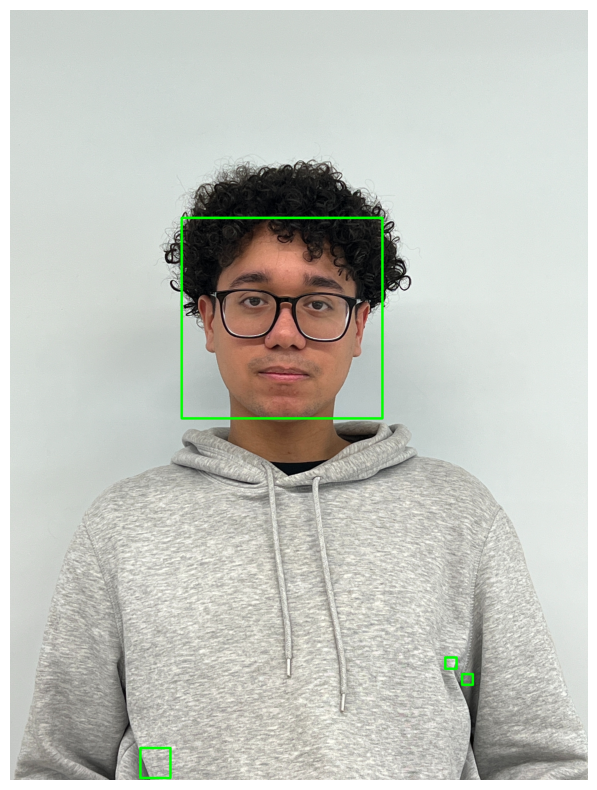

In [20]:
plt.figure(figsize=(20,10))
plt.imshow(img_rgb)
plt.axis('off')

Como podemos ver en en la primera imagen tiene falsos positivos, para ellos cambiamose el número de vecinos, en este caso, los aumentamos a 6.

(np.float64(-0.5), np.float64(3023.5), np.float64(4031.5), np.float64(-0.5))

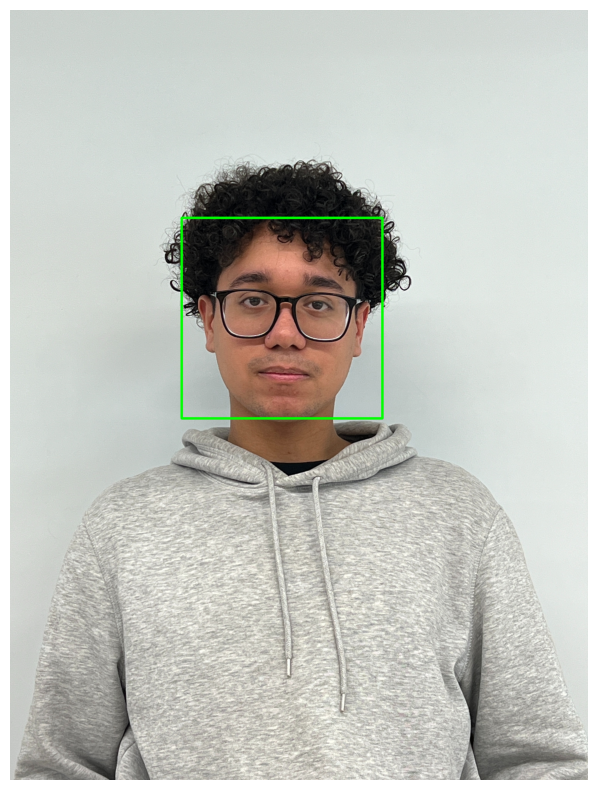

In [21]:

img = cv2.imread(imagePath)

gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

face = face_classifier.detectMultiScale(
    gray_image, scaleFactor=1.1, minNeighbors=6, minSize=(40, 40)
)
for (x, y, w, h) in face:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 12)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,10))
plt.imshow(img_rgb)
plt.axis('off')


## Parte 3

Ahora tendremos que crear una carpeta "imagenes" y dentro de esta crear 4 carpetas con fotos. 

Dentro de cada una colocaremos imágenes con el rostro de cada persona.

### [Código para capturar las imaganes de prueba de un vídeo](capturaRostros.py)

Crea un script entrena_caras.py que cree un dataset de entrenamiento: como Y una lista de identificadores (enteros) y como X una  
lista de fragmentos de las imágenes correspondientes a los rostros detectados por un clasificador en cascada.   
Crea un modelo (modelo=cv2.face.LBPHFaceRecognizer_create), entrénalo (modelo.train) y guarda el resultado (modelo.save) 